<a href="https://colab.research.google.com/github/skku-kdj/MLRobustness_eval/blob/main/art/attack/evasion/whitebox/FGSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Load pretrained VGG and classify image

In [ ]:
import torch
import os
import numpy as np
import torch.nn as nn
from torchvision.models import vgg16
from PIL import Image
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = vgg16(pretrained=True)

model.eval()
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
image = torch.unsqueeze(torch.rand(3, 224, 224), 0)
output = model(image.to(device))
pred = torch.argmax(output, dim=1)
print(pred)

tensor([892], device='cuda:0')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/data')

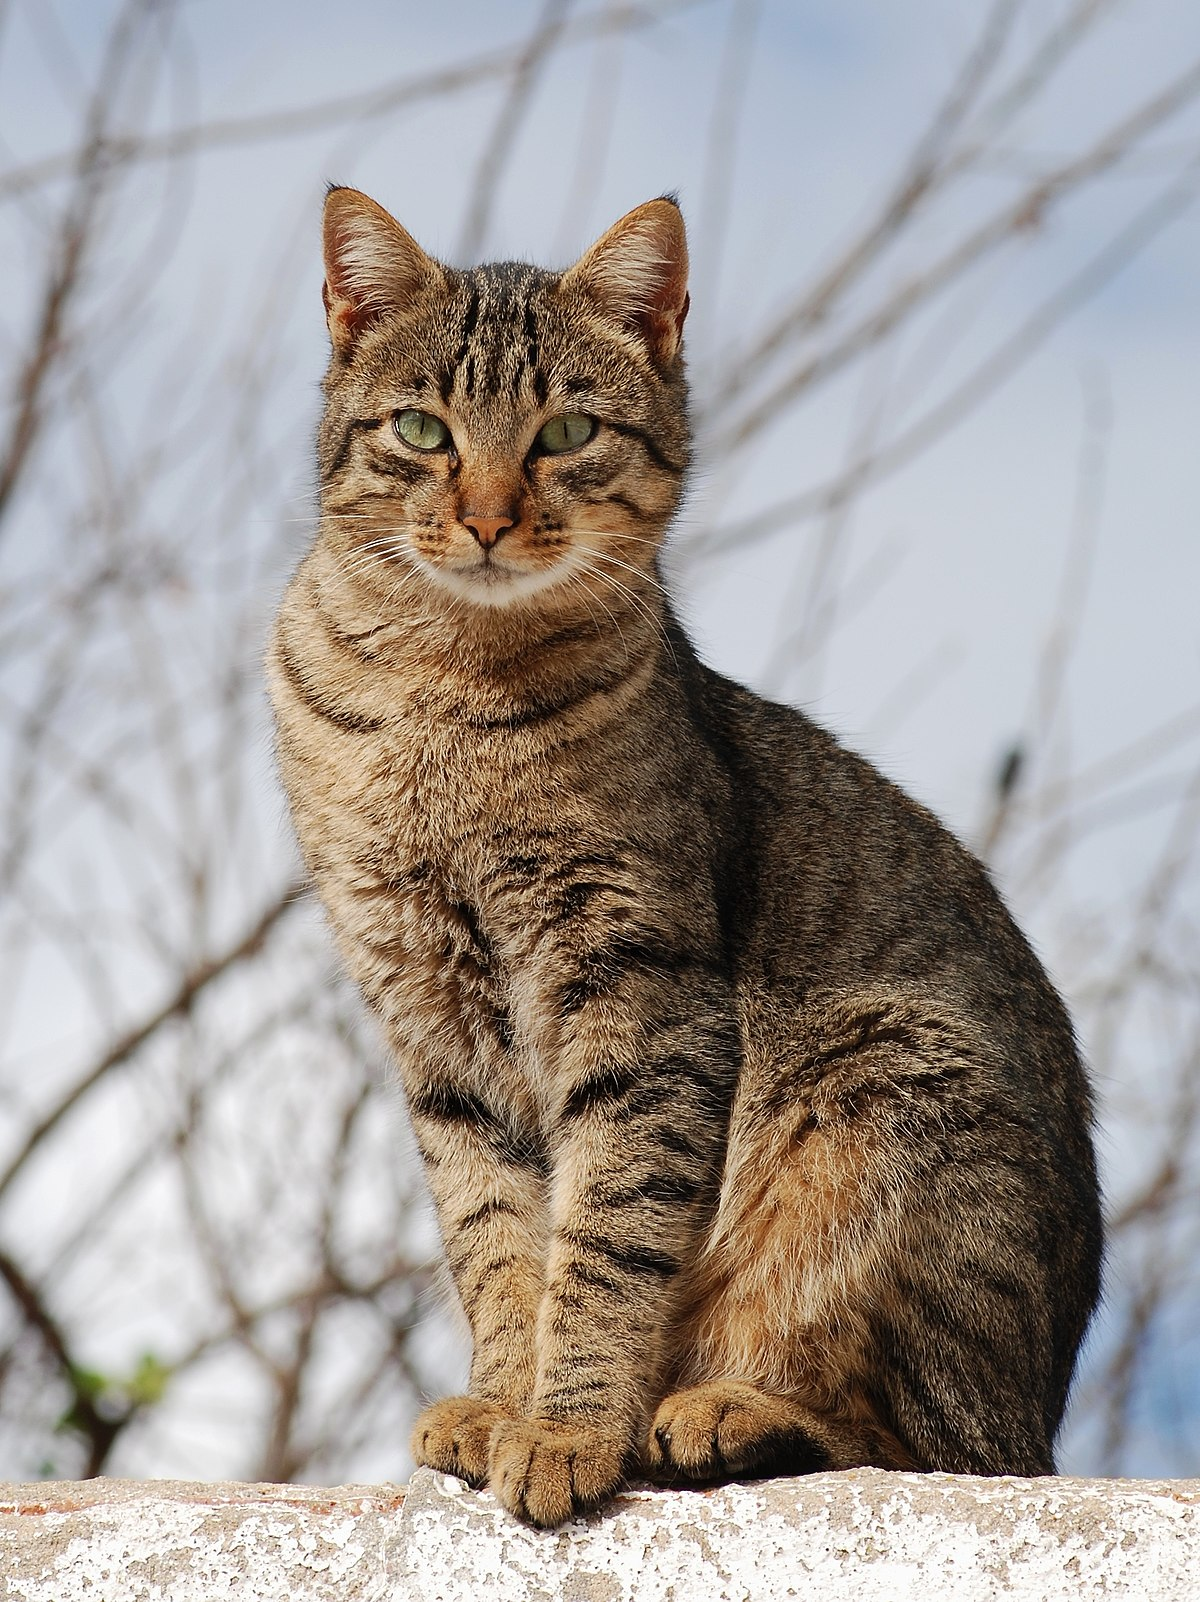

In [ ]:
img = Image.open('cat.jpg')
img

In [ ]:
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
img_t = transform(img)
img_t.shape

torch.Size([3, 224, 224])

In [ ]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
output = model(batch_t.to(device))
output.shape

torch.Size([1, 1000])

In [ ]:
with open("/content/drive/MyDrive/imagenet-classes.txt") as f:
  classes = [line.strip() for line in f.readlines()]
len(classes)
classes

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [ ]:
_, indices = torch.sort(output, descending=True)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Egyptian cat', 35.20071029663086),
 ('tiger cat', 32.88227844238281),
 ('tabby, tabby cat', 30.743127822875977),
 ('lynx, catamount', 0.387292742729187),
 ('washbasin, handbasin, washbowl, lavabo, wash-hand basin',
  0.044021137058734894)]

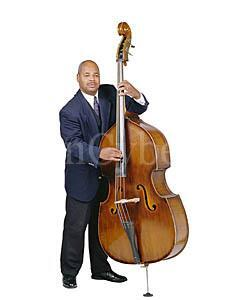

In [ ]:
img2 = Image.open('double_bass.jpg')
img2

In [ ]:
img2_t = transform(img2)
img2_t.shape

torch.Size([3, 224, 224])

In [ ]:
batch2_t = torch.unsqueeze(img2_t, 0)
output2 = model(batch2_t.to(device))
output2.shape

torch.Size([1, 1000])

In [ ]:
_, indices = torch.sort(output2, descending=True)
percentage = torch.nn.functional.softmax(output2, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('cello, violoncello', 94.826904296875),
 ('violin, fiddle', 5.047506332397461),
 ('bassoon', 0.03159332275390625),
 ('acoustic guitar', 0.03022797405719757),
 ('cornet, horn, trumpet, trump', 0.01380777545273304)]

###Hugging face transformers

In [ ]:
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoFeatureExtractor, ResNetForImageClassification
from datasets import load_dataset

In [ ]:
import io

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-18")

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
inputs = feature_extractor(image, return_tensors="pt")

In [ ]:
with torch.no_grad():
  logits = model(**inputs).logits

In [ ]:
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

tabby, tabby cat


In [ ]:
img = Image.open('cat.jpg')
inputs = feature_extractor(img, return_tensors="pt")
with torch.no_grad():
  logits = model(**inputs).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

Egyptian cat


In [ ]:
img = Image.open('double_bass.jpg')
inputs = feature_extractor(img, return_tensors="pt")
with torch.no_grad():
  logits = model(**inputs).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

cello, violoncello


###ART-Attack test

In [ ]:
!pip install adversarial-robustness-toolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.17.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

from art.attacks.evasion import FeatureAdversariesPyTorch
from art.estimators.classification import PyTorchClassifier
from art.utils import load_mnist

In [ ]:
#use mnist
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()
x_train = np.transpose(x_train, (0, 3, 1, 2)).astype(np.float32)
x_test = np.transpose(x_test, (0, 3, 1, 2)).astype(np.float32)

In [ ]:
#example model
model = nn.Sequential(
    nn.Conv2d(1, 4, 5), nn.ReLU(), nn.MaxPool2d(2, 2),
    nn.Conv2d(4, 10, 5), nn.ReLU(), nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(4*4*10, 100),
    nn.Linear(100, 10)
)

In [ ]:
#set loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#create art classifier
classifier = PyTorchClassifier(
  model=model,
  clip_values=(min_pixel_value, max_pixel_value),
  loss=criterion,
  optimizer=optimizer,
  input_shape=(1, 28, 28),
  nb_classes=10,
)

In [ ]:
#train art classifier
classifier.fit(x_train, y_train, batch_size=64, nb_epochs=3)

In [ ]:
#evaluate
predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 96.77%


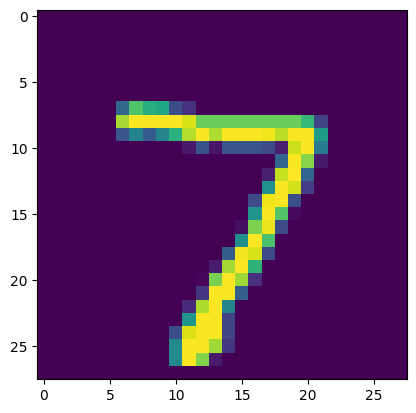

In [ ]:
plt.imshow(x_test[0,...].squeeze())

In [ ]:
example_prediction = classifier.predict(np.expand_dims(x_test[0, ...], axis=0))

predicted_label = np.argmax(example_prediction)
probability = example_prediction[0, predicted_label]

predicted_label, probability

(7, 22.921236)

In [ ]:
valid = np.argmax(y_test, axis=1)[:100] != np.argmax(y_test, axis=1)[100:200]
source = x_test[:100][valid][:32]
guide = x_test[100:200][valid][:32]

In [ ]:
#first attack version
attack = FeatureAdversariesPyTorch(
  classifier,
  layer=7,
  delta=35/255,
  optimizer=None,
  step_size=1/255,
  max_iter=100,
)
x_test_adv = attack.generate(source, guide)

Feature Adversaries PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test[:100][valid][:32], axis=1)) / len(y_test[:100][valid][:32])

dim = tuple(range(1, len(source.shape)))
pert = np.mean(np.amax(np.abs(source - x_test_adv), axis=dim))
print("Accuracy on adversarial test batch: {}%".format(accuracy * 100))
print("Average perturbation: {}%".format(pert))

Accuracy on adversarial test batch: 18.75%
Average perturbation: 0.13725492358207703%


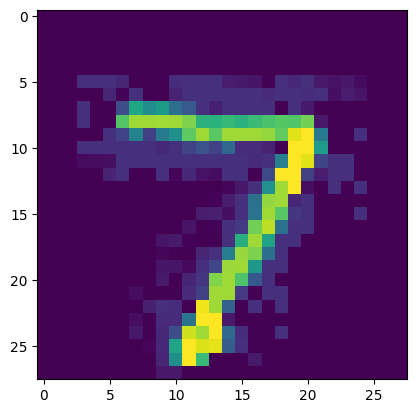

In [ ]:
plt.imshow(x_test_adv[0,...].squeeze())

In [ ]:
adv_example_prediction = classifier.predict(np.expand_dims(x_test_adv[1, ...], axis=0))

adv_predicted_label = np.argmax(adv_example_prediction)
adv_probability = adv_example_prediction[0, adv_predicted_label]

adv_predicted_label, adv_probability

(0, 13.229926)

In [ ]:
#second version of attack
attack = FeatureAdversariesPyTorch(
    classifier,
    layer=7,
    delta=61/255,
    optimizer=optim.Adam,
    optimizer_kwargs={"lr": 0.01},
    lambda_=1.0,
    max_iter=100,
    random_start=True
)
x_test_adv = attack.generate(source, guide)

Feature Adversaries PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test[:100][valid][:32], axis=1)) / len(y_test[:100][valid][:32])

dim = tuple(range(1, len(source.shape)))
pert = np.mean(np.amax(np.abs(source - x_test_adv), axis=dim))
print("Accuracy on adversarial test batch: {}%".format(accuracy * 100))
print("Average perturbation: {}%".format(pert))

Accuracy on adversarial test batch: 0.0%
Average perturbation: 0.2523260712623596%


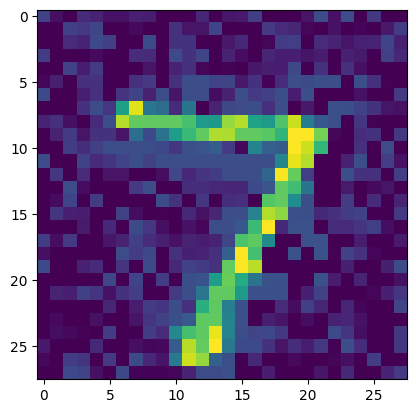

In [ ]:
plt.imshow(x_test_adv[0,...].squeeze())

#ART Attack - FastGradientMethod

In [ ]:
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import PyTorchClassifier

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = vgg16(pretrained=True)

classifier = PyTorchClassifier(
  model = model,
  clip_values=(0, 1),
  loss=criterion,
  optimizer=optimizer,
  input_shape=(3, 224, 224),
  nb_classes=1000,
)

In [ ]:
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
image = Image.open("cat.jpg")
image_tensor = transform(image).unsqueeze(0)
image_numpy = image_tensor.numpy()
image_numpy.shape

(1, 3, 224, 224)

In [ ]:
attack = FastGradientMethod(estimator=classifier, eps=0.2)
adv_image_numpy = attack.generate(x=image_numpy)

In [ ]:
def numpy_to_img(image_numpy):
  image_numpy = image_numpy.squeeze(0)
  image_numpy = image_numpy.transpose(1, 2, 0)
  image = image_numpy * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  return image

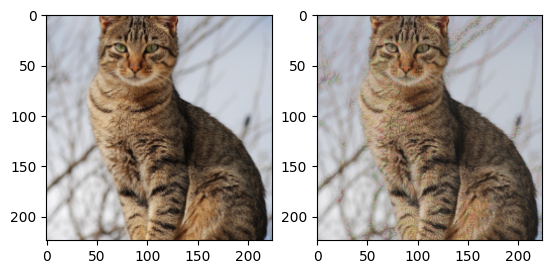

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(numpy_to_img(image_numpy))
axes[1].imshow(numpy_to_img(adv_image_numpy))
plt.show()

In [ ]:
adv_tensor = torch.from_numpy(adv_image_numpy).type(torch.cuda.FloatTensor)
adv_output= model(adv_tensor)

_, indices = torch.sort(adv_output, descending=True)
percentage = torch.nn.functional.softmax(adv_output, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('tiger cat', 60.56011199951172),
 ('tabby, tabby cat', 36.53135681152344),
 ('Egyptian cat', 1.9403109550476074),
 ('lynx, catamount', 0.1811780333518982),
 ('Persian cat', 0.09579215198755264)]

In [ ]:
attack = FastGradientMethod(estimator=classifier, eps=1)
adv2_image_numpy = attack.generate(x=image_numpy)

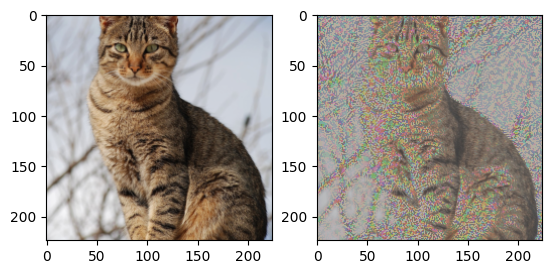

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(numpy_to_img(image_numpy))
axes[1].imshow(numpy_to_img(adv2_image_numpy))
plt.show()

In [ ]:
adv2_tensor = torch.from_numpy(adv2_image_numpy).type(torch.cuda.FloatTensor)
adv2_output= model(adv2_tensor)

_, indices = torch.sort(adv2_output, descending=True)
percentage = torch.nn.functional.softmax(adv2_output, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('stole', 26.735363006591797),
 ('cardigan', 13.698652267456055),
 ('poncho', 7.788191795349121),
 ('sock', 7.27293062210083),
 ('wool, woolen, woollen', 4.3015336990356445)]

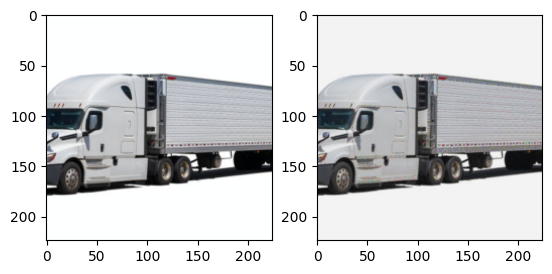

In [ ]:
image = Image.open("truck.jpg")
image_tensor = transform(image).unsqueeze(0)
image_numpy = image_tensor.numpy()

attack = FastGradientMethod(estimator=classifier, eps=0.2)
adv_image_numpy = attack.generate(x=image_numpy)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(numpy_to_img(image_numpy))
axes[1].imshow(numpy_to_img(adv_image_numpy))
plt.show()

In [ ]:
output = model(image_tensor.to('cuda'))

_, indices = torch.sort(output, descending=True)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
  93.34153747558594),
 ('moving van', 6.657698154449463),
 ('tow truck, tow car, wrecker', 0.00042152623063884676),
 ('garbage truck, dustcart', 0.00015640696801710874),
 ('mobile home, manufactured home', 9.763961134012789e-05)]

In [ ]:
adv_tensor = torch.from_numpy(adv_image_numpy).type(torch.cuda.FloatTensor)
adv_output= model(adv_tensor)

_, indices = torch.sort(adv_output, descending=True)
percentage = torch.nn.functional.softmax(adv_output, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('moving van', 73.88882446289062),
 ('trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
  26.101688385009766),
 ('garbage truck, dustcart', 0.00403347285464406),
 ('recreational vehicle, RV, R.V.', 0.0024595537688583136),
 ('mobile home, manufactured home', 0.001658851746469736)]